<a href="https://colab.research.google.com/github/CHBLESSY/-Income-prediction/blob/main/Income_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [11]:
df=pd.read_csv("/content/drive/MyDrive/data set/adult.csv")

In [12]:
df.head()

,age,worktype,fnlwt,education,education_number,marital_status,occupation,relatioship_status,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,"', '', '', '', 'hours_per_week', '', ''"
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [13]:
df.dtypes


,0
age,int64
worktype,object
fnlwt,int64
education,object
education_number,int64
marital_status,object
occupation,object
relatioship_status,object
race,object
sex,object


In [14]:
df = df.drop(columns=[col for col in df.columns if 'unnamed' in col.lower()], errors='ignore')


In [15]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [16]:
X = df.drop(columns=['income'])  # Adjust if the column name differs
y = df['income']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
print(f"Training Set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing Set: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training Set: X_train = (26048, 14), y_train = (26048,)
Testing Set: X_test = (6513, 14), y_test = (6513,)


In [27]:
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}


In [28]:
for name, model in models.items():
    model.fit(X_train, y_train)  # Training the model
    print(f"{name} model trained successfully!")


SVM model trained successfully!
Random Forest model trained successfully!
Logistic Regression model trained successfully!



SVM Model Performance:
Accuracy: 0.8561338860740059
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4945
           1       0.77      0.57      0.66      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.76      0.78      6513
weighted avg       0.85      0.86      0.85      6513



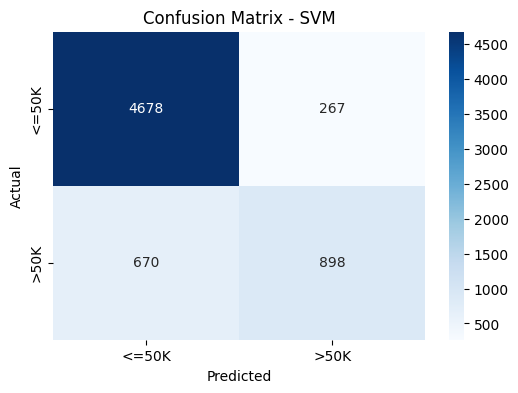


Random Forest Model Performance:
Accuracy: 0.8619683709504069
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.75      0.64      0.69      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



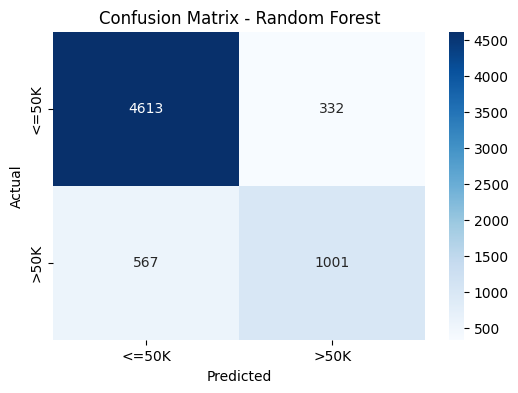


Logistic Regression Model Performance:
Accuracy: 0.8278826961461692
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4945
           1       0.72      0.46      0.56      1568

    accuracy                           0.83      6513
   macro avg       0.79      0.70      0.73      6513
weighted avg       0.82      0.83      0.81      6513



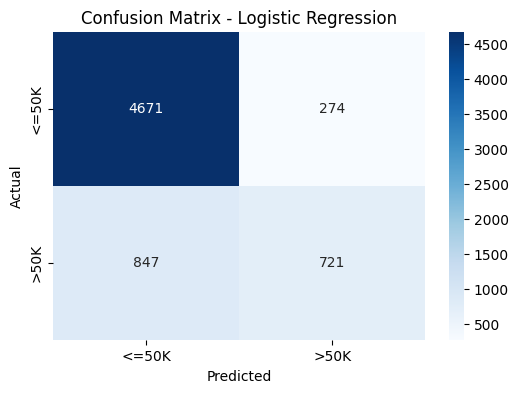

In [30]:
accuracy_scores = {}

for name, model in models.items():  # Use 'models' instead of 'trained_models'
    y_pred = model.predict(X_test)  # Make predictions on unseen data

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

    # Print Model Performance
    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot Confusion Matrix as Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


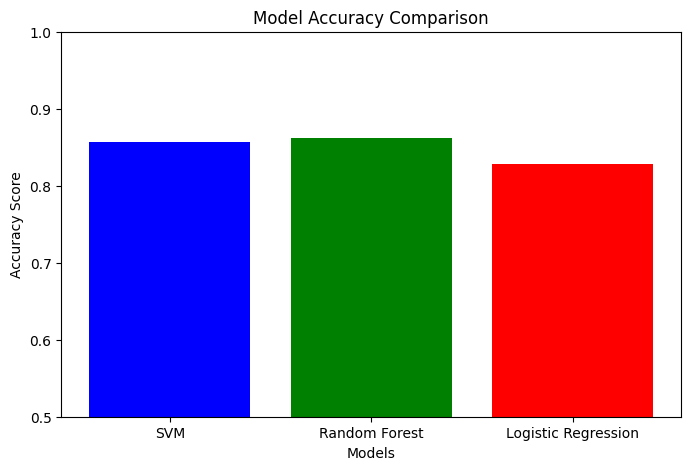

In [31]:
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0.5, 1.0)
plt.show()


In [32]:
def evaluate_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)  # Make predictions

    # Print Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n🔹 {model_name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")

    # Print Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return accuracy  # Return accuracy for comparison



🔹 SVM Model Performance:
Accuracy: 0.8561
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4945
           1       0.77      0.57      0.66      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.76      0.78      6513
weighted avg       0.85      0.86      0.85      6513



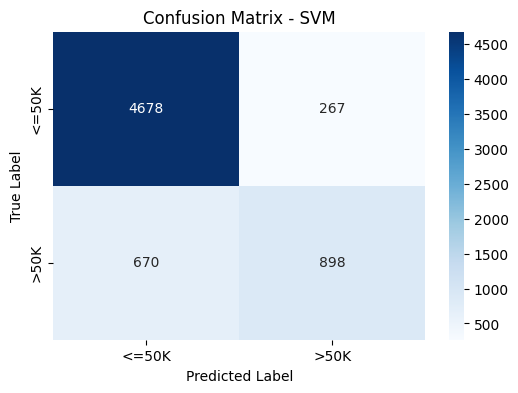


🔹 Random Forest Model Performance:
Accuracy: 0.8620
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.75      0.64      0.69      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



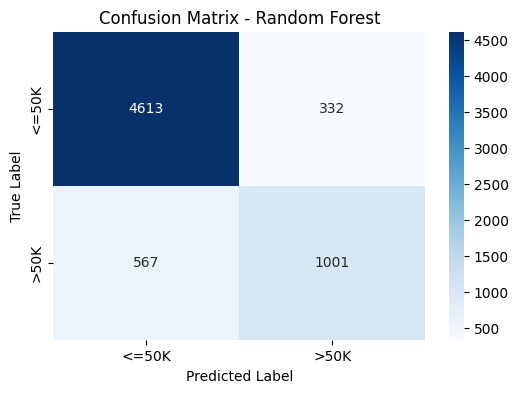


🔹 Logistic Regression Model Performance:
Accuracy: 0.8279
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4945
           1       0.72      0.46      0.56      1568

    accuracy                           0.83      6513
   macro avg       0.79      0.70      0.73      6513
weighted avg       0.82      0.83      0.81      6513



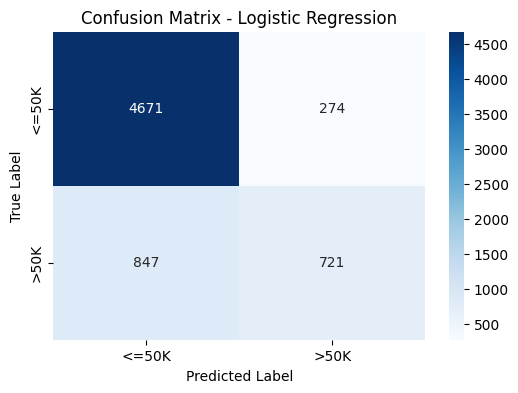

In [34]:
accuracy_scores = {}  # Store accuracy scores for comparison

# Evaluate SVM
accuracy_scores["SVM"] = evaluate_model(models["SVM"], "SVM", X_test, y_test) # Use 'models' instead of 'trained_models'

# Evaluate Random Forest
accuracy_scores["Random Forest"] = evaluate_model(models["Random Forest"], "Random Forest", X_test, y_test) # Use 'models' instead of 'trained_models'

# Evaluate Logistic Regression
accuracy_scores["Logistic Regression"] = evaluate_model(models["Logistic Regression"], "Logistic Regression", X_test, y_test) # Use 'models' instead of 'trained_models'

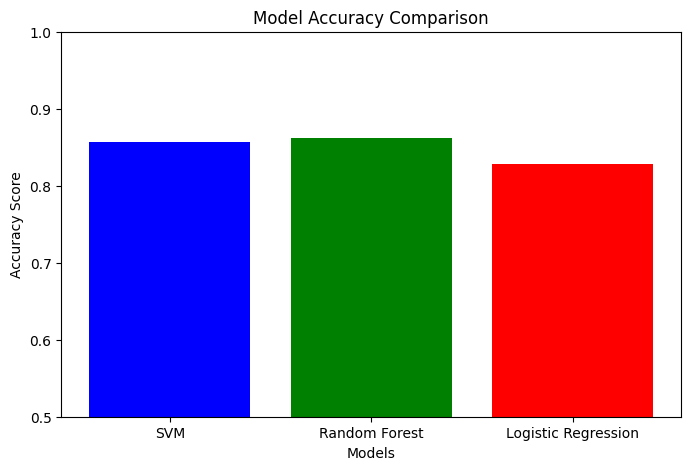

In [35]:
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0.5, 1.0)  # Keep Y-axis between 50% - 100% for better visibility
plt.show()


In [39]:
def plot_confusion_matrix(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)  # Make predictions
    cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix

    # Plot heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


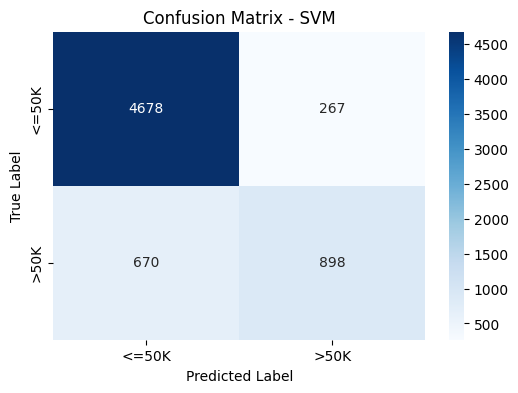

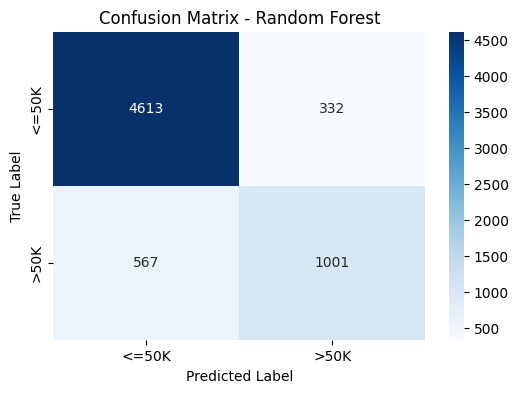

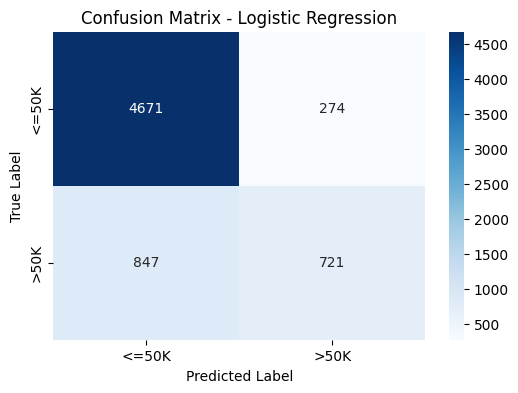

In [41]:
plot_confusion_matrix(models["SVM"], "SVM", X_test, y_test)
plot_confusion_matrix(models["Random Forest"], "Random Forest", X_test, y_test)
plot_confusion_matrix(models["Logistic Regression"], "Logistic Regression", X_test, y_test)

In [14]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split # Importing train_test_split

# ... (Your existing code for defining svm_params, rf_params, lr_params, and evaluate_params) ...

# Load your data into a DataFrame named 'df'
# Replace 'your_data.csv' with the actual path to your data file
df = pd.read_csv('/content/drive/MyDrive/data set/adult.csv')

# Assuming df is your DataFrame
X = df.drop(columns=['income'])  # Features (adjust 'income' if it's a different target column)
y = df['income']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Defining and assigning X_train, X_test, y_train, y_test

# ... (Rest of your code) ...

In [27]:
# Initialize label_encoders dictionary
label_encoders = {}
# Apply Label Encoding to categorical features in X
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder() # This line and subsequent lines within the loop should be indented
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
# Apply Label Encoding to target variable y
le = LabelEncoder()
y = le.fit_transform(y)
label_encoders['income'] = le